# Installs & Imports

In [2]:
# Install packages
!pip install pandas numpy matplotlib seaborn scipy openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# SECTION 1: Data Cleaning & Data Exploration

In [4]:
# Load the header row to see the column names
df_preview = pd.read_excel("BDSII Daten 2 - Original.xlsx",
                        sheet_name = "Tabelle1",
                        nrows = 0)

print(df_preview.columns.tolist())

['Nr.', 'ZSK1', 'ZSK2', 'ZSK3', 'Vola4', 'Vola5', 'Vola6', 'Verlust7', 'Verlust8', 'MR9', 'MR10', 'MR11', 'MR12', 'MR13', 'MR14', 'MR15', 'MR16', 'MR17', 'MR18', 'MR19', 'MR20', 'GCR', 'SF', 'VT', 'EM', 'SCR', 'Quote', 'SCR_Sterblichkeit', 'SCR_Langlebigkeit', 'SCR_Invalidität/Morbidität', 'SCR_Kosten', 'SCR_Stornoanstieg', 'SCR_Stornor\x81ückgang', 'SCR_Massenstorno', 'SCR_Katastrophe', 'SCR_Zinsrü\x81ckgang', 'SCR_Zinsanstieg', 'SCR_Zins', 'SCR_Aktien - sonstige', 'SCR_Aktien', 'SCR_Spread - Kreditderivate', 'SCR_Spread - Verbriefungen', 'SCR_Spread', 'SCR_Währung', 'SCR_Storno', 'SCR_Ausfall', 'SCR_vt. Risiko Leben', 'SCR_Marktrisiko', 'SCR_KV - Invalidität/Morbidität-Krankenkosten', 'SCR_KV - Storno', 'SCR_KV - Invalidität/Morbidität', 'SCR_vt. Risiko Kranken Leben', 'SCR_vt. Risiko Kranken']


In [5]:
# Read the sheet 
df = pd.read_excel("BDSII Daten 2 - Original.xlsx", sheet_name = "Tabelle1")

# The columns we do not need
cols_to_drop = [
    "GCR",
    "SF",
    "VT",
    "SCR_Sterblichkeit",
    "SCR_Langlebigkeit",
    "SCR_Invalidität/Morbidität",
    "SCR_Kosten",
    "SCR_Stornoanstieg",
    "SCR_Stornorückgang",   
    "SCR_Stornorückgang", 
    "SCR_Zinsrückgang",
    "SCR_Massenstorno",
    "SCR_Katastrophe",
    "SCR_Zinsrückgang",
    "SCR_Zinsanstieg",
    "SCR_Zins",
    "SCR_Aktien - sonstige",
    "SCR_Aktien",
    "SCR_Spread - Kreditderivate",
    "SCR_Spread - Verbriefungen",
    "SCR_Spread",
    "SCR_Währung",
    "SCR_Storno",
    "SCR_Ausfall",
    "SCR_vt. Risiko Leben",
    "SCR_Marktrisiko",
    "SCR_KV - Invalidität/Morbidität-Krankenkosten",
    "SCR_KV - Storno",
    "SCR_KV - Invalidität/Morbidität",
    "SCR_vt. Risiko Kranken Leben",
    "SCR_vt. Risiko Kranken"
]

# Drop the columns
df = df.drop(columns = cols_to_drop, errors = "ignore")

# Save the cleaned data to a csv file
df.to_csv("BDSII_Daten_2_clean.csv", index = False, encoding = "utf-8")

## SECTION 1.1: Exploratory Data Analysis (EDA)

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv("BDSII_Daten_2_clean.csv")

# Define feature columns and targets 
feature_cols = ['ZSK1', 'ZSK2', 'ZSK3', 'Vola4', 'Vola5', 'Vola6', 
                'Verlust7', 'Verlust8', 'MR9', 'MR10', 'MR11', 'MR12', 
                'MR13', 'MR14', 'MR15', 'MR16', 'MR17', 'MR18', 'MR19', 'MR20']
target_cols = ['EM', 'SCR', 'Quote']

# Drop 'Nr.' because it's just an index
if 'Nr.' in df.columns:
    df = df.drop('Nr.', axis=1)


# Print shape and first 5 rows
print(f"Dataset shape: {df.shape}")
print(f"Features: {len(feature_cols)} columns")
print(f"Targets available: EM, SCR, Quote (EM/SCR ratio)")
print(f"\nFirst 5 rows:\n{df.head()}")

# Verify Quote calculation
print(f"\nQuote validation (should be ~0): {(df['Quote'] - df['EM']/df['SCR']).abs().max():.6f}")


Dataset shape: (10230, 23)
Features: 20 columns
Targets available: EM, SCR, Quote (EM/SCR ratio)

First 5 rows:
       ZSK1      ZSK2      ZSK3     Vola4     Vola5     Vola6  Verlust7  \
0  0.922054  0.837028  0.809331  0.178250  0.901512  0.179174  0.191340   
1  0.619457  0.135444  0.742208  0.895245  0.203651  0.913381  0.066844   
2  0.527813  0.066627  0.979909  0.088391  0.905464  0.964193  0.445658   
3  0.471844  0.922035  0.351186  0.162060  0.121955  0.002218  0.269084   
4  0.940594  0.515785  0.569936  0.505810  0.090705  0.095968  0.987834   

   Verlust8   MR9  MR10  ...      MR14  MR15    MR16  MR17  MR18  MR19  MR20  \
0  0.056881  0.25  0.25  ...  0.222222  0.60  0.4825  0.38  1.00     1   0.6   
1  0.195996  0.25  0.25  ...  0.222222  0.60  0.4825  0.38  1.00     1   0.6   
2  0.465802  0.25  0.25  ...  0.222222  0.60  0.4825  0.38  1.00     1   0.6   
3  0.183026  0.25  0.25  ...  0.222222  0.35  0.4825  0.38  1.00     1   0.6   
4  0.026776  0.20  0.10  ...  0.88888

In [7]:
# Summary statistics for all targets
print(f"\nTARGET VARIABLES SUMMARY:")
for target in target_cols:
    print(f"\n\t {target}:")
    print(f"\t\t Mean: {df[target].mean():.2f}, Std: {df[target].std():.2f}")
    print(f"\t\t Min: {df[target].min():.2f}, Max: {df[target].max():.2f}")
    print(f"\t\t Median: {df[target].median():.2f}")

# Check for missing values
print(f"\nMISSING VALUES COUNT:")
missing_counts = df[feature_cols + target_cols].isnull().sum()
print(missing_counts[missing_counts > 0] if missing_counts.any() else "No missing values found")



TARGET VARIABLES SUMMARY:

	 EM:
		 Mean: 1114671387.37, Std: 433682060.51
		 Min: -4740847371.09, Max: 2109556898.96
		 Median: 1180780200.16

	 SCR:
		 Mean: 633980325.14, Std: 293138588.69
		 Min: 224202772.87, Max: 2149266315.21
		 Median: 505468137.09

	 Quote:
		 Mean: 2.17, Std: 1.01
		 Min: -2.47, Max: 4.65
		 Median: 2.43

MISSING VALUES COUNT:
No missing values found


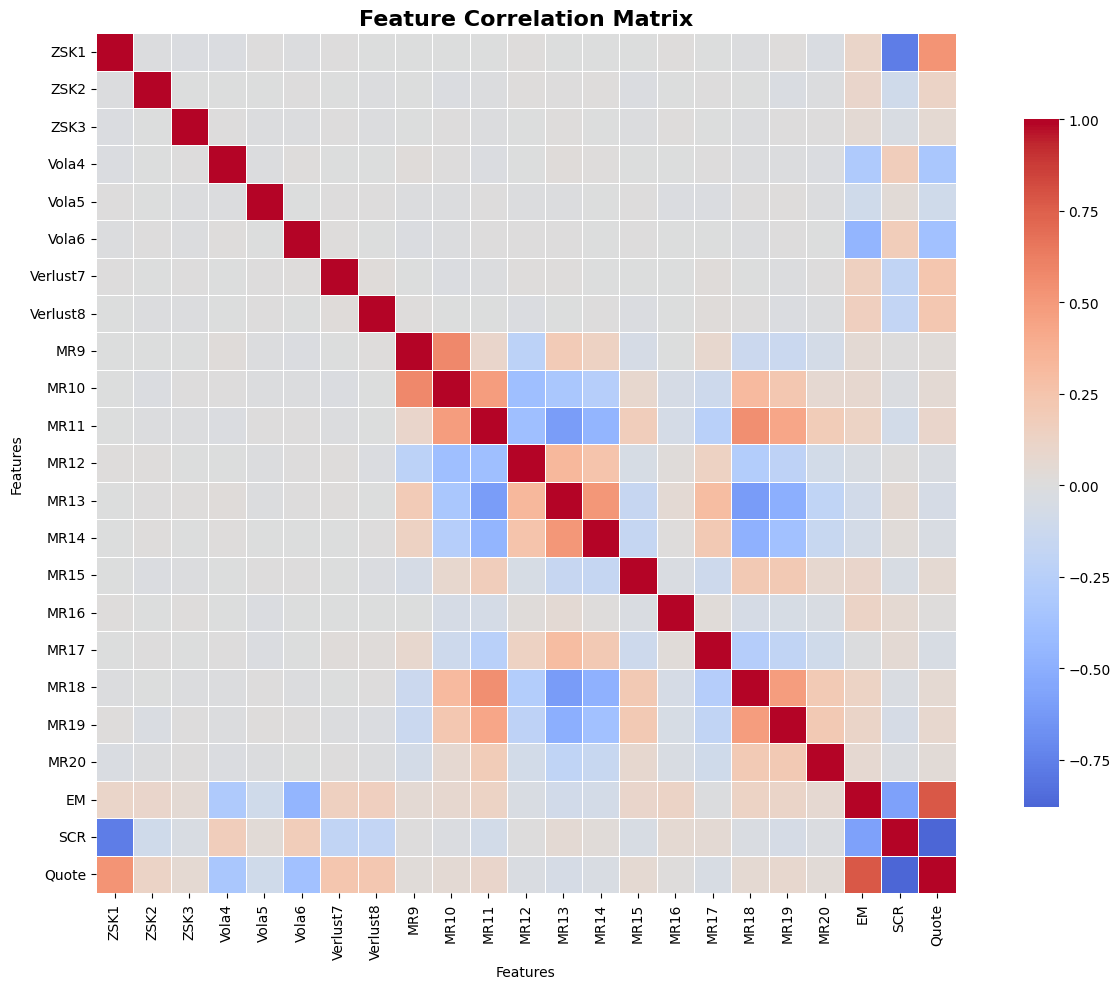

In [8]:
# Correlation matrix heatmap for all features
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

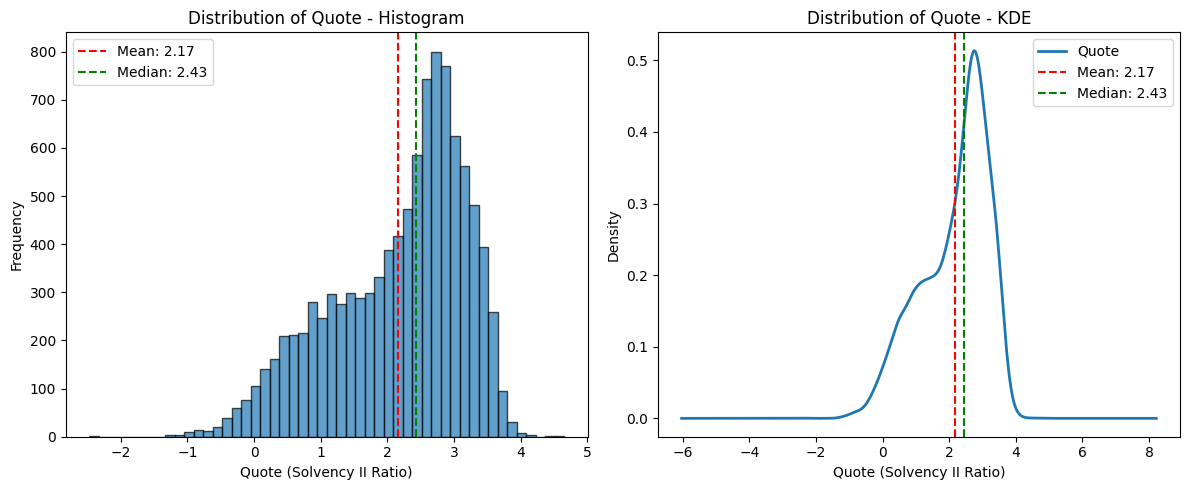

In [9]:
# Histogram/KDE of Quote
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Quote'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Quote (Solvency II Ratio)')
plt.ylabel('Frequency')
plt.title('Distribution of Quote - Histogram')
plt.axvline(df['Quote'].mean(), color='red', linestyle='--', label=f'Mean: {df["Quote"].mean():.2f}')
plt.axvline(df['Quote'].median(), color='green', linestyle='--', label=f'Median: {df["Quote"].median():.2f}')
plt.legend()

plt.subplot(1, 2, 2)
df['Quote'].plot(kind='kde', linewidth=2)
plt.xlabel('Quote (Solvency II Ratio)')
plt.ylabel('Density')
plt.title('Distribution of Quote - KDE')
plt.axvline(df['Quote'].mean(), color='red', linestyle='--', label=f'Mean: {df["Quote"].mean():.2f}')
plt.axvline(df['Quote'].median(), color='green', linestyle='--', label=f'Median: {df["Quote"].median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Statistical analysis of Quote 
print(f"\nQUOTE ANALYSIS:")
print(f"Mean: {df['Quote'].mean():.3f}, Std: {df['Quote'].std():.3f}")
print(f"Range: [{df['Quote'].min():.3f}, {df['Quote'].max():.3f}]")
print(f"Skewness: {stats.skew(df['Quote']):.3f}")
print(f"Kurtosis: {stats.kurtosis(df['Quote']):.3f}")
print(f"Observations with Quote < 1 (undercapitalized): {(df['Quote'] <= 1).sum()} ({(df['Quote'] <= 1).mean()*100:.1f}%)")
print(f"Observations with Quote > 2 (well-capitalized): {(df['Quote'] >= 2).sum()} ({(df['Quote'] >= 2).mean()*100:.1f}%)")


QUOTE ANALYSIS:
Mean: 2.166, Std: 1.005
Range: [-2.472, 4.653]
Skewness: -0.695
Kurtosis: -0.299
Observations with Quote < 1 (undercapitalized): 1654 (16.2%)
Observations with Quote > 2 (well-capitalized): 6499 (63.5%)
